In [1]:
from cycler import cycler
import matplotlib.pyplot as plt
import numpy
import xarray

In [2]:
# 100-day time averages
M4 = xarray.open_mfdataset('/glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.25deg_N15_baseline_hmix20/longmean_*.nc', decode_times=False)
M8 = xarray.open_mfdataset('/glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.125deg_N15_baseline_hmix20/longmean_*.nc', decode_times=False)
M16 = xarray.open_mfdataset('/glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.0625deg_N15_baseline_hmix20/longmean_*.nc', decode_times=False)
M32 = xarray.open_mfdataset('/glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.03125deg_N15_baseline_hmix20/longmean_*.nc', decode_times=False)

In [247]:
zi=3
# select two latitudes based on the mean h map
latC=0.
lonC=15.
lonE=45.

ds=M4
iC4=numpy.argmin(abs(ds.yh.values-latC))
jC4=numpy.argmin(abs(ds.xh.values-lonC))
jE4=numpy.argmin(abs(ds.xh.values-lonE))

ds=M8
iC8=numpy.argmin(abs(ds.yh.values-latC))
jC8=numpy.argmin(abs(ds.xh.values-lonC))
jE8=numpy.argmin(abs(ds.xh.values-lonE))

ds=M16
iC16=numpy.argmin(abs(ds.yh.values-latC))
jC16=numpy.argmin(abs(ds.xh.values-lonC))
jE16=numpy.argmin(abs(ds.xh.values-lonE))

ds=M32
iC32=numpy.argmin(abs(ds.yh.values-latC))
jC32=numpy.argmin(abs(ds.xh.values-lonC))
jE32=numpy.argmin(abs(ds.xh.values-lonE))

[[M4.yh[iC4].values, M8.yh[iC8].values, M16.yh[iC16].values, M32.yh[iC32].values],
 [M4.xh[jC4].values, M8.xh[jC8].values, M16.xh[jC16].values, M32.xh[jC32].values],]

[[array(-0.125), array(-0.0625), array(-0.03125), array(-0.015625)],
 [array(14.875), array(14.9375), array(14.96875), array(14.984375)]]

In [248]:
# Select data and cleanup
UH4 = M4.e.isel(zi=zi,xh=jC4,yh=iC4).drop('zi').drop('yh').drop('xh')
UH8 = M8.e.isel(zi=zi,xh=jC8,yh=iC8).drop('zi').drop('yh').drop('xh')
UH16 = M16.e.isel(zi=zi,xh=jC16,yh=iC16).drop('zi').drop('yh').drop('xh')
UH32 = M32.e.isel(zi=zi,xh=jC32,yh=iC32).drop('zi').drop('yh').drop('xh')

In [249]:
# Recorded start time of segment
Toff4 = 1.5*UH4.time[0]-0.5*UH4.time[1]
Toff8 = 1.5*UH8.time[0]-0.5*UH8.time[1]
Toff16 = 1.5*UH16.time[0]-0.5*UH16.time[1]
Toff32 = 1.5*UH32.time[0]-0.5*UH32.time[1]
Toff4, Toff8, Toff16, Toff32

(<xarray.DataArray 'time' ()>
 array(0.),
 <xarray.DataArray 'time' ()>
 array(0.),
 <xarray.DataArray 'time' ()>
 array(0.),
 <xarray.DataArray 'time' ()>
 array(0.))

In [250]:
%time LT4=UH4.compute() 

CPU times: user 28.4 ms, sys: 532 ms, total: 560 ms
Wall time: 10.5 s


In [251]:
%time LT8=UH8.compute()

CPU times: user 11.4 ms, sys: 93.1 ms, total: 104 ms
Wall time: 1.24 s


In [252]:
%time LT16=UH16.compute() 

CPU times: user 8.59 ms, sys: 107 ms, total: 116 ms
Wall time: 1.77 s


In [253]:
%time LT32=UH32.compute() 

CPU times: user 25.1 ms, sys: 80.5 ms, total: 106 ms
Wall time: 1.27 s


In [254]:
# 5-day time averages
m4 = xarray.open_mfdataset('/glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.25deg_N15_baseline_hmix20/averages_*.nc', decode_times=False)
m8 = xarray.open_mfdataset('/glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.125deg_N15_baseline_hmix20/averages_*.nc', decode_times=False)
m16 = xarray.open_mfdataset('/glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.0625deg_N15_baseline_hmix20/averages_*.nc', decode_times=False)
m32 = xarray.open_mfdataset('/glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.03125deg_N15_baseline_hmix20/averages_*.nc', decode_times=False)

In [255]:
# Select data and cleanup
uh4 = m4.e.isel(zi=zi,xh=jC4,yh=iC4).drop('zi').drop('yh').drop('xh')#-m4.e.isel(zi=zi,xh=jE4,yh=iC4).drop('zi').drop('yh').drop('xh')
uh8 = m8.e.isel(zi=zi,xh=jC8,yh=iC8).drop('zi').drop('yh').drop('xh')#-m8.e.isel(zi=zi,xh=jE8,yh=iC8).drop('zi').drop('yh').drop('xh')
uh16 = m16.e.isel(zi=zi,xh=jC16,yh=iC16).drop('zi').drop('yh').drop('xh')#-m16.e.isel(zi=zi,xh=jE16,yh=iC16).drop('zi').drop('yh').drop('xh')
# uh32: 'Dataset' object has no attribute 'e': now fixed
uh32 = m32.e.isel(zi=zi,xh=jC32,yh=iC32).drop('zi').drop('yh').drop('xh')#-m32.e.isel(zi=zi,xh=jE32,yh=iC32).drop('zi').drop('yh').drop('xh')

In [256]:
# Recorded start time of segment
toff4 = 1.5*uh4.time[0]-0.5*uh4.time[1]
toff8 = 1.5*uh8.time[0]-0.5*uh8.time[1]
toff16 = 1.5*uh16.time[0]-0.5*uh16.time[1]
toff32 = 1.5*uh32.time[0]-0.5*uh32.time[1]
toff4, toff8, toff16, toff32

(<xarray.DataArray 'time' ()>
 array(30000.),
 <xarray.DataArray 'time' ()>
 array(2500.),
 <xarray.DataArray 'time' ()>
 array(5000.),
 <xarray.DataArray 'time' ()>
 array(2300.))

In [257]:
%time T4=uh4.compute()

CPU times: user 19.9 ms, sys: 620 ms, total: 640 ms
Wall time: 13.5 s


In [258]:
%time T8=uh8.compute()

CPU times: user 20.6 ms, sys: 1.07 s, total: 1.09 s
Wall time: 21.6 s


In [259]:
%time T16=uh16.compute()

CPU times: user 3.5 ms, sys: 273 ms, total: 276 ms
Wall time: 783 ms


In [260]:
%time T32=uh32.compute()

CPU times: user 7.42 ms, sys: 193 ms, total: 200 ms
Wall time: 3.63 s


In [261]:
# Adjust times so series are contiguous
def adjtime(prev,next):
    start = 1.5*next.time[0]-0.5*next.time[1]
    end = 1.5*prev.time[-1]-0.5*prev.time[-2]
    return (next.time-start)+end
T8['time'] = adjtime(T4,T8)+toff8
T16['time'] = adjtime(T8,T16)+toff16
T32['time'] = adjtime(T16,T32)+toff32
LT8['time'] = adjtime(LT4,LT8)+Toff8
LT16['time'] = adjtime(LT8,LT16)+Toff16
LT32['time'] = adjtime(LT16,LT32)+Toff32

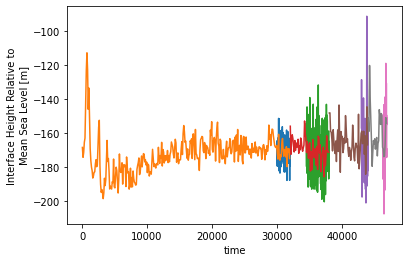

In [262]:
T4.plot();
LT4.plot();
T8.plot();
LT8.plot();
T16.plot();
LT16.plot();
T32.plot();
LT32.plot();
#plt.xlim(28000,44000); plt.ylim(0.4,0.7)

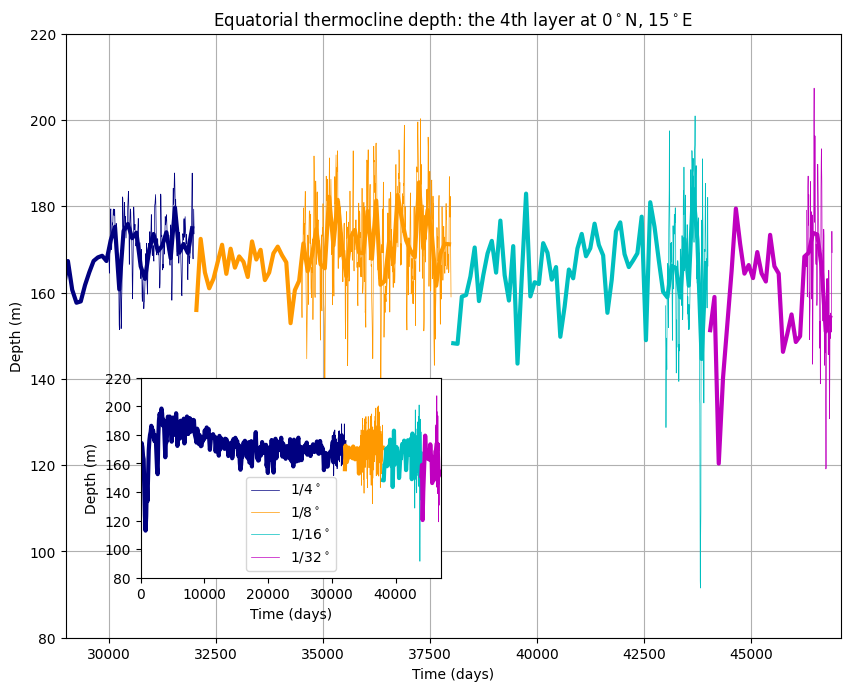

In [263]:
fig,ax = plt.subplots(1,1,figsize=(10,8),dpi=100)
def plot(ax, lw1=0.5, lw2=3):
    cyc = cycler(color=[[0,0,0.5], [1,.6,0], 'c', 'm'])
    ax.set_prop_cycle( cyc )
    (-T4).plot(linewidth=lw1, label='1/4$^\circ$')
    (-T8).plot(linewidth=lw1, label='1/8$^\circ$')
    (-T16).plot(linewidth=lw1, label='1/16$^\circ$')
    (-T32).plot(linewidth=lw1, label='1/32$^\circ$')
    ax.set_prop_cycle( cyc )
    (-LT4).plot(linewidth=lw2)
    (-LT8).plot(linewidth=lw2)
    (-LT16).plot(linewidth=lw2)
    (-LT32).plot(linewidth=lw2)
    plt.xlabel('Time (days)'); plt.ylabel('Depth (m)');
plot(ax)
plt.xlim(29000,47100); plt.ylim(80,220); plt.title('Equatorial thermocline depth: the 4th layer at 0$^\circ$N, 15$^\circ$E'); plt.grid();

ax = plt.axes((.2,.2,.3,.25))
plot(ax)
plt.xlim(0,47100); plt.ylim(80,220); plt.legend();
plt.savefig('equatorial-thermocline-depth-time-series-HMIX20-zi=3.png')



In [27]:
LT4.to_netcdf('LT4-HMIX20_10E.nc')
LT8.to_netcdf('LT8-HMIX20_10E.nc')
LT16.to_netcdf('LT16-HMIX20_10E.nc')
LT32.to_netcdf('LT32-HMIX20_10E.nc')
T4.to_netcdf('T4-HMIX20_10E.nc')
T8.to_netcdf('T8-HMIX20_10E.nc')
T16.to_netcdf('T16-HMIX20_10E.nc')
T32.to_netcdf('T32-HMIX20.nc')